# Creating WordCloud from Youtube Comments


참고한 자료들:
1. [Youtube API를 이용한 게시글 전체 댓글 크롤링](https://pbj0812.tistory.com/293)
2. https://towardsdatascience.com/how-to-build-your-own-dataset-of-youtube-comments-39a1e57aade

3. https://python.gotrained.com/youtube-api-extracting-comments/

https://console.cloud.google.com/apis/dashboard


In [1]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser

In [2]:
DEVELOPER_KEY = ""
YOUTUBE_API_SERVICE_NAME="youtube"
YOUTUBE_API_VERSION="v3"
youtube = build(YOUTUBE_API_SERVICE_NAME,YOUTUBE_API_VERSION,developerKey=DEVELOPER_KEY)

In [3]:
tesla_comments = []

tesla_results = youtube.commentThreads().list(
    videoId = 'PtxMYGxQ9Zc',
    order='time',
    part = 'snippet',
    textFormat='plainText',
    maxResults = 100
    ).execute()

In [4]:
while tesla_results:
    for item in tesla_results['items']:
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        tesla_comments.append(comment)
        
    if 'nextPageToken' in tesla_results:
            pageToken = tesla_results['nextPageToken']
            tesla_results = youtube.commentThreads().list(
                videoId = 'PtxMYGxQ9Zc',
                order='time',
                part = 'snippet',
                textFormat='plainText',
                pageToken = pageToken,
                maxResults = 100
                ).execute()
    else:
        break

In [5]:
print(tesla_comments)

["The problem with the acceleration is everybody will eventually have similar cars and you won't be able to overtake any other cars because of the similar performance. Hopefully I'll be dead before these monstrocities are compulsory.", 'this new one is rather disappointing....a bit to much faffing to sort basic stuff out...mirrors etc.', 'What other car in its price range does 0-60 in 3. 2 seconds and can back it up again and again.', 'there is a cycle called the refrigeration cycle on which cooling works, you just reverse that cycle, you get a heat pump sort of a thing. just to give a glance of what that is.', "it's called heat scavenging. the Heatpump takes heat from the battery and motor to help heat up the cabin.", 'Something like a reverse refrigerator? Start by looking up "Peltier chips", they can be used for heating,  reverse the polarity and now they cool, very cold in fact. And you can also use them to turn heat into electricity. And the nice bit about them is you can buy them

In [6]:
# #for importing data and wrangling
# import pandas as pd
# import numpy as np

# #for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

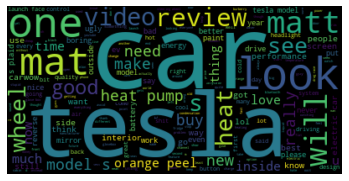

In [7]:
# join the list and lowercase all the words
tesla_comments = ' '.join(tesla_comments).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(tesla_comments)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [8]:
print(STOPWORDS)

{'com', 'all', 'if', 'themselves', 'to', 'do', 'shall', 'ourselves', 'it', 'having', "shouldn't", 'against', "haven't", 'between', 'me', 'for', "she'll", 'does', 'there', 'yours', 'i', "we'd", 'can', "they'd", "who's", 'our', 'then', "can't", 'am', "we're", 'in', "when's", "hadn't", "where's", 'off', "what's", "didn't", 'after', 'else', 'below', 'himself', 'which', 'where', 'be', 'by', 'has', 'him', 'how', "weren't", "aren't", 'therefore', "she'd", 'yourselves', 'what', 'why', "don't", 'no', "you're", 'about', "won't", 'www', "we've", 'these', "shan't", 'yourself', 'with', 'ought', 'and', 'hers', 'at', 'otherwise', "wasn't", "they'll", "he'd", 'because', "how's", 'few', "they're", "hasn't", "let's", "isn't", 'itself', 'same', 'is', 'such', 'nor', 'as', 'more', 'into', "why's", 'until', 'she', 'some', 'when', 'their', 'who', 'being', 'are', 'too', 'had', 'whom', 'your', 'only', 'been', 'like', 'her', "i'm", 'since', 'further', 'his', "i'll", 'http', 'so', 'were', "wouldn't", 'over', 'ea

In [9]:
STOPWORDS.update(["car","review","video","one"])

In [10]:
print(STOPWORDS)

{'com', 'all', 'if', 'themselves', 'to', 'do', 'shall', 'ourselves', 'it', 'having', 'tesla', "shouldn't", 'against', "haven't", 'between', 'me', 'for', "she'll", 'does', 'there', 'yours', 'i', "we'd", 'can', "they'd", "who's", 'our', 'then', "can't", 'am', "we're", 'in', "when's", "hadn't", "where's", 'off', "what's", "didn't", 'after', 'else', 'below', 'himself', 'which', 'where', 'be', 'by', 'has', 'him', 'how', "weren't", "aren't", 'therefore', "she'd", 'yourselves', 'what', 'why', "don't", 'no', "you're", 'about', "won't", 'www', "we've", 'these', "shan't", 'car', 'yourself', 'with', 'ought', 'and', 'hers', 'at', 'otherwise', "wasn't", "they'll", "he'd", 'because', "how's", 'few', "they're", "hasn't", "let's", "isn't", 'itself', 'same', 'is', 'such', 'nor', 'as', 'more', 'into', 'one', "why's", 'until', 'she', 'some', 'when', 'their', 'who', 'being', 'are', 'too', 'had', 'whom', 'your', 'only', 'been', 'like', 'her', "i'm", 'since', 'further', 'his', "i'll", 'http', 'so', 'were', 

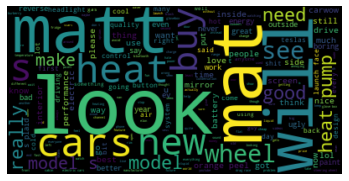

In [11]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(tesla_comments)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [12]:
ipace_comments = []

ipace_results = youtube.commentThreads().list(
    videoId = 'FILPOpickH4',
    order='time',
    part = 'snippet',
    textFormat='plainText',
    maxResults = 100
    ).execute()

In [16]:
while ipace_results:
    for item in ipace_results['items']:
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        ipace_comments.append(comment)
        
    if 'nextPageToken' in ipace_results:
            pageToken = ipace_results['nextPageToken']
            ipace_results = youtube.commentThreads().list(
                videoId = 'PtxMYGxQ9Zc',
                order='time',
                part = 'snippet',
                textFormat='plainText',
                pageToken = pageToken,
                maxResults = 100
                ).execute()
    else:
        break

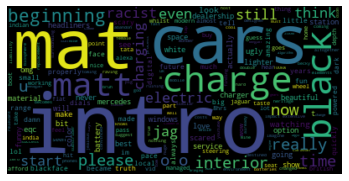

In [17]:
# join the list and lowercase all the words
ipace_comments = ' '.join(ipace_comments).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(ipace_comments)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [18]:
STOPWORDS.update(["intro","cars"])

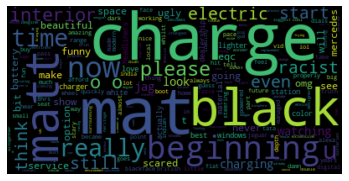

In [19]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(ipace_comments)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()